# Introduction to regression with neautral networks in tensorflow

There are many definitions for a regression problem but in our case we are going to simplify it.
predicting a numerical variables base on other combination of variables, even shorter... predicting numbers

In [1]:
# import tensorflow 
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt



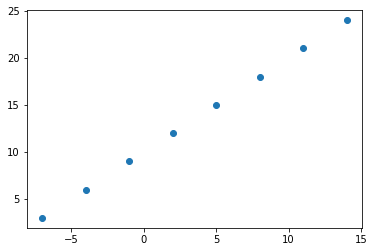

In [3]:
# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels for y
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
             
# Visualize x and y
plt.scatter(x,y)

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## input and output shapes



In [5]:
# create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom,', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom,', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
x[0], y[0]

(-7.0, 3.0)

In [7]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
x[0].ndim

0

In [9]:
x[0], y[0]

(-7.0, 3.0)

In [10]:
# turn our numpy arrays to tensors
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape =x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## steps in modelling with tensorflow

1. create a model = define the input and output layers, as well as hidden layers of a deep learning model.
2. compiling a model -  define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer (tell our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. fitting a model - letting the model try to find patterns between x and y (features and labels)

In [12]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2.  compile the model
model.compile(loss= tf.keras.losses.mae, #mea is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=['mae'])

# 3. fit the model
#model.fit(x,y, epochs = 5)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)



Epoch 1/5
1/1 [==============================] - 0s 456ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [13]:
# check outx and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# try and make prdictions using our model
y_preds= model.predict([17.0])
y_preds

array([[12.716021]], dtype=float32)

# Improving our model

we can improve our model, by altering the steps we took to create a model.

1. creating a model - here we might add more layers, increase the number of hidden layers, change the activation function of each layer

2. compiling a model - here we might change the optimization function or perhaps the **learning rate** of the optimization function

3. fitting a model = here we might fit a model for more **epochs** (leave it training for longer) or no more data (give the model more examples to learn from).

In [15]:
# lets rebuild our model

# 1. create the model
model= tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ['mae'])

# 3. fit the model
#model.fit(x, y, epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 276ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [16]:
# lets see if our model has prediction has improved
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [17]:
## lets see if we can add more adjustment with extra hidden layer with 100 hidden units

# 1. create the model
model= tf.keras.Sequential([tf.keras.layers.Dense(50, activation =None),
                            tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss='mae',
              optimizer = tf.keras.optimizers.Adam(lr= 0.01),
              metrics= ['mae'])

# 3. fit the model
#model.fit(x, y, epochs=100)
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 432ms/step - loss: 11.7682 - mae: 11.7682
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0963 - mae: 11.0963
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4150 - mae: 10.4150
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7212 - mae: 9.7212
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0104 - mae: 9.0104
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 8.2778 - mae: 8.2778
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.5198 - mae: 7.5198
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9648 - mae: 6.9648
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0672 - mae: 7.0672
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.3315 - mae: 7.3315
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4673 - ma

In [18]:
# lets try to make prediction
model.predict([17.0])

array([[26.58353]], dtype=float32)

## Evaluting a model

in pratice, a typical workflow you will go through when building neautral networks is:

build a model => fit it => evaluate it => tweak a model => fit it => evaluate it => tweak it => fit it => evaluate it....

when it comes to evaluation ... there are 3 words you should memorize:

> 'Visualize, visualize, visualize'

its a good idea to visualize:

* The data - what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The praining of model - how does a model perform while it learns?
* The predicitions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [19]:
# make a bigger dataset
x = tf.range(-100, 100 , 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

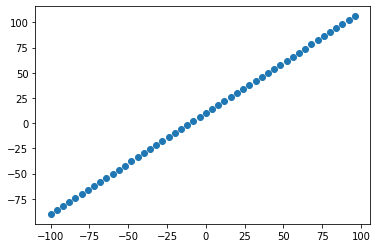

In [21]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

## The 3 steps.... 

* Training set - the model learns from the data, which is typically 70-80% of the total
data you have available.
* validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* test set-  the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available


In [22]:
# check the length of how many samples we have
len(x)

50

In [23]:
# split the data into train and test sets
x_train = x[:40] # first 40 are training (80% of the data)
y_train = y[:40]

x_test = x[40:]  # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we va got out data in training and test sets... lets visualize  it again!

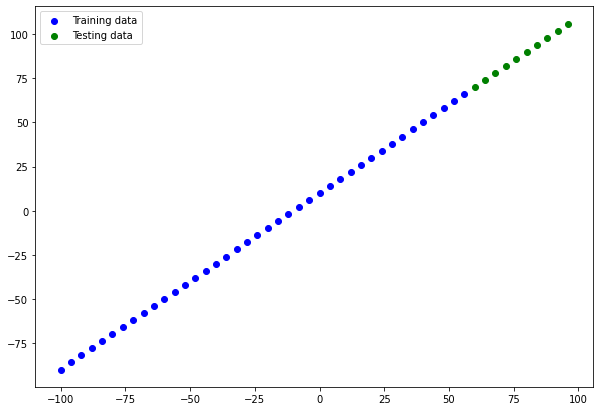

In [24]:
plt.figure(figsize= (10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
#plot test data in green
plt.scatter(x_test, y_test, c='g', label= 'Testing data')
# show legend
plt.legend();

In [25]:
## lets have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3 fit the model
#model.fit(x_train, y_train, epochs=100)

In [26]:
# lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name ='input_layer'),
                             tf.keras.layers.Dense(1, name= 'output_shape')
                             ]# name = 'one of many models we are going to build...'
                             )
# 2. compile the model
model.compile( loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_shape (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params: total number of parameters in the model.
Trainable params: these are the parameters(patterns) the model can update as it trains
Non-trainable params: these parameters arent updated during training (this is typical when you bring in already learn patterns or parameters from other models durinf transfer learning)

https://deeplizard.com/learn/video/8d-9SnGt5E0

http://introtodeeplearning.com/

In [28]:
# lets fit our model to the training model
model.fit(x_train, y_train, epochs=100, verbose=0)

In [29]:
# get the summary of model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_shape (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


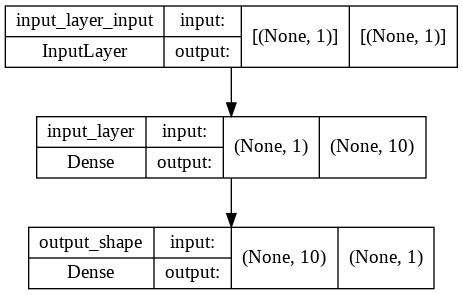

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

# visualizing our model prediction

To visualize predicitions, its a good idea to plot them against the ground truth labels.

often you will see this in the form of y_test or y_predsverus y_preds (ground truth versus your models predicitions

In [31]:
# make some predicitions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

note if you feel like you are going to reuse some kind of functionality in the future, its a good idea to turn it into functions

In [33]:
# lets create a ploting function

def plot_predicitions(train_data = x_train,
                      train_labels= y_train,
                      test_data = x_test,
                      test_labels = y_test,
                      predicitions = y_pred
                      ):
  """
  plot training data, test data and compare predicitions to ground truth
  """
  plt.figure(figsize= (10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  #plot test data in green
  plt.scatter(test_data, test_labels, c='g', label= 'Testing data')
  #plot model predicitions in red
  plt.scatter(test_data, predicitions, c='r', label ='Predictions')
  # show legend
  plt.legend();

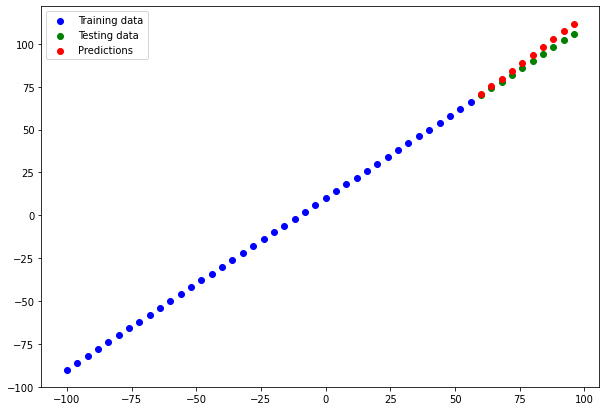

In [34]:
plot_predicitions()

from numpy.ma.core import absolute
## Evaulating  our models predicitions with regression evalaution metrics

Depending on the problem you are working on , there will be different evaluation
metrics to evalaute your models performance

since we are working on regression, two of the main metrics:
* MAE -  mean absolute error, ' on average how wrong is each of my models prediction'
* MSE - mean sqaure error, 'square the average errors'

In [35]:
# evalaute the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [36]:
# calculate the mean absolute error
mae =tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred= tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [37]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [38]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [39]:
 # calculate the mean absolute error
mae =tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred= tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [40]:
# calculate the mse
mse = tf.metrics.mean_squared_error(y_true=y_test,
                               y_pred= tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [41]:
# make some functions to use mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true =y_test,
                                        y_pred = tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                            y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model

build a model -> fit it -> evalaute it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it

1. Get more data - get more examples for your model to train on (most opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using a complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

lets do 3 modelling experiments:
1 'model-1'- same as original, 1 layer, trained for 100 epochs.
2 'model_2' - 2 layers, trained for 100 epochs
3 'model_3'  - 2 layers, trained for 500 epochs

Build model_1

In [42]:

# 1. create the model
model_1= tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ['mse'])
  

# 3. fit the model
#model_1.fit(x, y, epochs=100)
model_1.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 11.6762 - mse: 198.1642
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2572 - mse: 226.4037
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 18.0408 - mse: 472.1568
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1129 - mse: 114.7501
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.4630 - mse: 310.5071
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.7585 - mse: 220.1948
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2550 - mse: 114.6186
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9843 - mse: 204.2327
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0412 - mse: 124.1212
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0876 - mse: 105.8195
Epoch 11/100
2/2 [==============================]

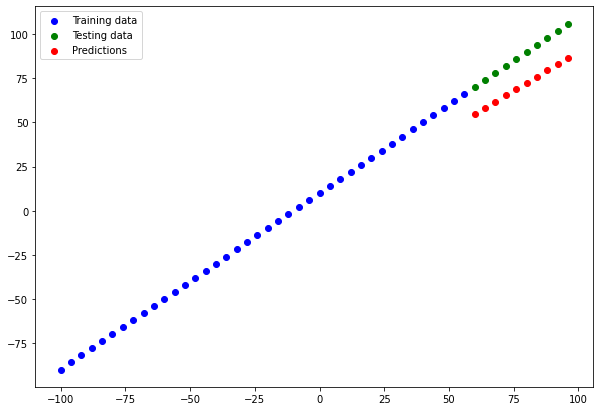

In [43]:
# make and plot prediction for model_1
y_pred_1 = model_1.predict(x_test)
plot_predicitions(predicitions=y_pred_1)

In [44]:
# calculate our evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.323328>,
 <tf.Tensor: shape=(), dtype=float32, numpy=301.8012>)

Build model_2

* 2 dense layers trained for 100 epochs

In [45]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                            ])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ['mse'])

# 3. fit the model
#model_2.fit(x, y, epochs=100)
model_2.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 40.2867 - mse: 2321.9255
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.9297 - mse: 954.1400
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 44.1696 - mse: 2935.2297
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2212 - mse: 160.3935
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 23.0317 - mse: 764.6420
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 24.2563 - mse: 911.0153
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2416 - mse: 161.5344
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 34.1576 - mse: 1550.3259
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5246 - mse: 236.5703
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1823 - mse: 121.3602
Epoch 11/100
2/2 [=========================

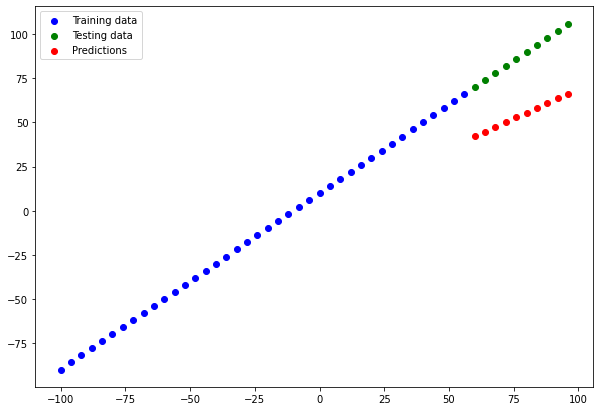

In [46]:
# make and plot predictions of model_2
# make and plot prediction for model_1
y_pred_2 = model_2.predict(x_test)
plot_predicitions(predicitions=y_pred_2)

In [47]:
# calculate our evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.827583>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1158.2341>)

model_3

In [48]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_3= tf.keras.Sequential([
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                            ])

# 2. compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics= ['mae'])

# 3. fit the model
#model_3.fit(x, y, epochs=100)
model_3.fit(tf.expand_dims(x, axis=-1), y, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 8ms/step - loss: 40.2867 - mae: 40.2867
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 25.9297 - mae: 25.9297
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 44.1696 - mae: 44.1696
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 11.2212 - mae: 11.2212
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 23.0317 - mae: 23.0317
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 24.2563 - mae: 24.2563
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.2416 - mae: 11.2416
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 34.1576 - mae: 34.1576
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 12.5246 - mae: 12.5246
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 10.1823 - mae: 10.1823
Epoch 11/500
2/2 [==============================] - 0s 4ms/

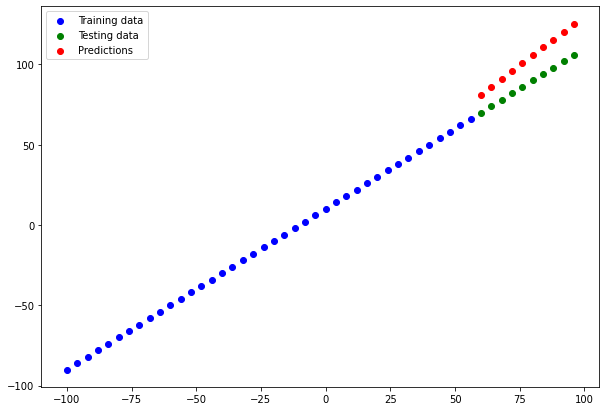

In [49]:
# make and plot predictions of model_2
# make and plot prediction for model_1
y_pred_3 = model_3.predict(x_test)
plot_predicitions(predicitions=y_pred_3)

In [50]:
# calculate our evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=15.080874>,
 <tf.Tensor: shape=(), dtype=float32, numpy=235.06535>)

# You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

Comparing the results of our experiments

we have run a few experiments, lets compare the results

In [55]:
# lets compare our model results using a pandas datafram
import pandas as pd

model_results = (['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()])

all_results = pd.DataFrame( model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,17.323328,301.801208
1,model_2,33.827583,1158.234131
2,model_3,15.080874,235.065353


**Note** One of your main goals should be to minimze the time between your experiments. The more experiments yyou do, the more things you will figure out which dont work and in turn, get closer to figuring out what does work. remeber the machine learing practioner;s motto: 'experiment, experiment, experiment'.

## Tracking your experiments
one of the good habits in machine learning modelling is to track the result of your experiment

And when doing so, it can be tedious if you are running lots of experiments

Luckilt, there are tools to help us!

**Resources** As you build more models, you will want to look into using:

* TensorBoard - a component of Tensorflow library to help track modelling experiments (we will see this later).ResourceWarning

* weights and biases - a tool used for tracking all kinds of machine learning experiments (plugs straight into tensor TensorBoard)

## Saving our model 
saving our model allows us to use them outside of google colab ( or wherever they were trained) such as in web application or a mobile app

there are two main formats we can save our models too:

1. The savedModel format
2. The HDF5 (Hierarchical Data format)

In [58]:
# save model using the saved model format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [59]:
# save model using HDF5 format
model_2.save('best_model_HDF5_format.h5')

## loading in saved  model

In [62]:
#load in savedmodel format model
loaded_SsavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SsavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compare model_2 predictions with saved Model format predictions
model_2_preds = model_2.predict(x_test)
loaded_SsavedModel_format_preds = loaded_SsavedModel_format.predict(x_test)
model_2_preds == loaded_SsavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [64]:
mae(y_true= y_test, y_pred=model_2_preds) == mae(y_true= y_test, y_pred= loaded_SsavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [66]:
model_2_preds.squeeze() == loaded_SsavedModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [69]:
# laoding the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model

In [70]:
# check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds = loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [71]:
# Download files from colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
# save a file from google colab to googledrive (requires mounting Google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Tensor

In [73]:
ls /content/drive/MyDrive/Tensor

best_model_HDF5_format.h5


# A larger example